# Visual Analysis of Preferred Foot in European Soccer Leagues
### Jacob Miller
Using the European Soccer Database from Kaggle, I am going to determine if there is any correlation (positive, negative, neutral) between foot preference and other foot skills. 

In [1]:
# Package imports
%matplotlib inline
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Player_Attributes as df
cnx = sqlite3.connect('../Week 5/Week-5-Exercises-2/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
# Count NaN, drop NaN values
print('NaN values -before- dropping:')
print(df.isnull().sum().sum())
df.dropna(inplace = True)
print('\nNaN values -after- dropping:')
print(df.isnull().sum().sum())

NaN values -before- dropping:
47301

NaN values -after- dropping:
0


In [4]:
# Count how many prefer left/right
preferred_foot = df['preferred_foot'].value_counts()
print('Preferred foot:\n' + preferred_foot.to_string())

Preferred foot:
right    136247
left      44107


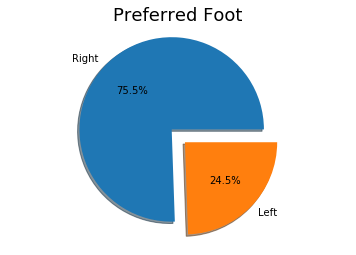

In [5]:
# Display preferred foot as pie chart
fig1, ax1 = plt.subplots()
ax1.pie(preferred_foot,
        labels = ['Right', 'Left'],
        autopct = '%1.1f%%',
        explode = [0.1, 0.1],
        shadow = True)
ax1.axis('equal')
plt.title('Preferred Foot',
          fontdict = {'fontsize' : 18})
plt.show()

In [6]:
# Turn preferred foot into integer for analysis
print('Foot preference -before- changing to integer:')
print(df['preferred_foot'].head().to_string())

df.loc[df['preferred_foot'] == 'right', 'preferred_foot'] = 0
df.loc[df['preferred_foot'] == 'left', 'preferred_foot'] = 1

print('\nFoot preference -after- changing to integer:')
print(df['preferred_foot'].head().to_string())

Foot preference -before- changing to integer:
0    right
1    right
2    right
3    right
4    right

Foot preference -after- changing to integer:
0    0
1    0
2    0
3    0
4    0


In [7]:
# Pull out foot-related skills
foot_skills = df[['preferred_foot',
                  'crossing',
                  'finishing',
                  'short_passing',
                  'volleys',
                  'dribbling',
                  'curve',
                  'free_kick_accuracy',
                  'long_passing',
                  'ball_control',
                  'shot_power',
                  'long_shots',
                  'penalties']]

In [8]:
# Compute and show correlations
correlations = foot_skills.corr()
print(correlations)

                    preferred_foot  crossing  finishing  short_passing  \
preferred_foot            1.000000  0.174033  -0.012004       0.073302   
crossing                  0.174033  1.000000   0.576896       0.790323   
finishing                -0.012004  0.576896   1.000000       0.580245   
short_passing             0.073302  0.790323   0.580245       1.000000   
volleys                   0.011572  0.637527   0.851482       0.639995   
dribbling                 0.083831  0.809747   0.784988       0.788935   
curve                     0.128510  0.788924   0.691082       0.731948   
free_kick_accuracy        0.124475  0.708763   0.633274       0.693490   
long_passing              0.094717  0.685649   0.341121       0.803073   
ball_control              0.074678  0.807721   0.720694       0.890622   
shot_power                0.057309  0.656740   0.727835       0.722320   
long_shots                0.059462  0.716515   0.806895       0.729741   
penalties                 0.016476  0.

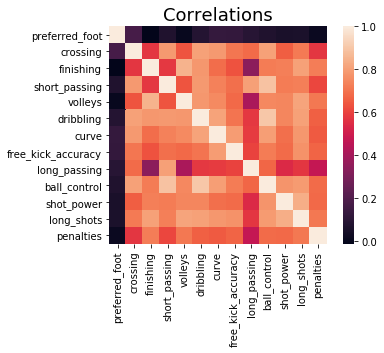

In [9]:
# Plot correlations
ax2 = sns.heatmap(correlations, square = True)
plt.title('Correlations', fontdict = {'fontsize' : 18})
plt.show()

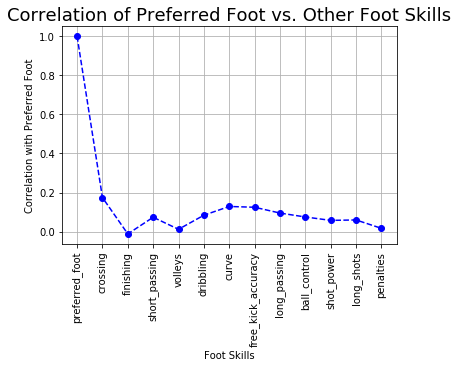

In [10]:
# Plot correlations with preferred foot
fig3, ax3 = plt.subplots()
ax3.plot(correlations['preferred_foot'], 'bo--')
plt.grid(True)
plt.xlabel('Foot Skills')
plt.ylabel('Correlation with Preferred Foot')
plt.xticks(rotation = 90)
plt.title('Correlation of Preferred Foot vs. Other Foot Skills',
          fontdict = {'fontsize' : 18})
plt.show()